In [1]:
import galsim
import numpy as np
import matplotlib.pyplot as plt

Generate a galaxy with $\gamma_1 = 0.19$, $\gamma_2 = -0.11$, $\kappa = 0.14$:

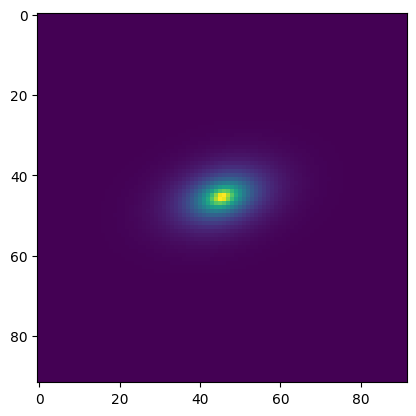

In [2]:
gamma1 = 0.19
gamma2 = -0.11
kappa = 0.14

g1 = gamma1/(1-kappa)
g2 = gamma2/(1-kappa)
mu = 1/((1-kappa)**2 - gamma1**2 - gamma2**2)

gal = galsim.Exponential(flux=1e5, half_light_radius=2.7)
gal_original = gal.lens(g1=g1, g2=g2, mu=mu)
img_original = gal_original.drawImage().array
_ = plt.imshow(img_original)

### Rotation

Rotate the above image by 90 degrees:

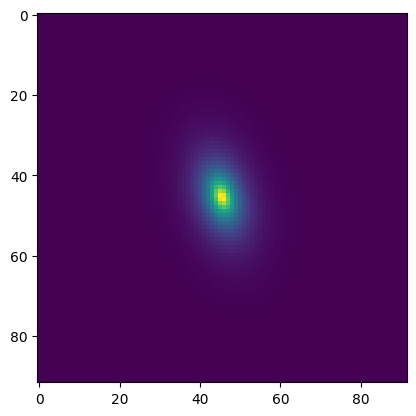

In [3]:
img_rotated = np.rot90(img_original)

_ = plt.imshow(img_rotated)

If the image is rotated by an angle $\theta$, the shear changes as follows:

$$
\begin{bmatrix} \gamma_1^* \\ \gamma_2^* \end{bmatrix} = \begin{bmatrix}
\cos(2\theta) & -\sin(2\theta) \\
\sin(2\theta) & \cos(2\theta)
\end{bmatrix} \begin{bmatrix} \gamma_1 \\ \gamma_2 \end{bmatrix} = \begin{bmatrix} \gamma_1 \cos(2\theta) - \gamma_2\sin(2\theta) \\ \gamma_1 \sin(2\theta) + \gamma_2 \cos(2\theta) \end{bmatrix}
$$

So if we rotate it by 90 degrees, we have

$$
\begin{bmatrix} \gamma_1^* \\ \gamma_2^* \end{bmatrix} = \begin{bmatrix} -\gamma_1 \\ -\gamma_2 \end{bmatrix}.
$$

The convergence $\kappa$ does not change under rotation.

To check our work, we lens the same galaxy as above using $\gamma_1^*$ and $\gamma_2^*$:

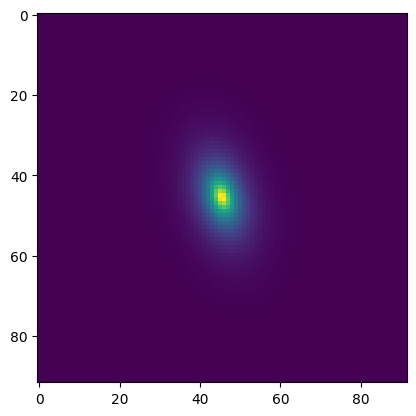

In [4]:
gamma1_new = -gamma1
gamma2_new = -gamma2
kappa_new = kappa

g1_new = gamma1_new/(1-kappa_new)
g2_new = gamma2_new/(1-kappa_new)
mu_new = 1/((1-kappa_new)**2 - gamma1_new**2 - gamma2_new**2)

gal_new = gal.lens(g1=g1_new, g2=g2_new, mu=mu_new)
img_new = gal_new.drawImage().array
_ = plt.imshow(img_new)

We find that we recover the same lensed galaxy profile as in the rotated image. Here are the flattened pixel intensities of the rotated image (lensed by $\gamma_1$ and $\gamma_2$) and the new image (lensed by $\gamma_1^*$ and $\gamma_2^*$):

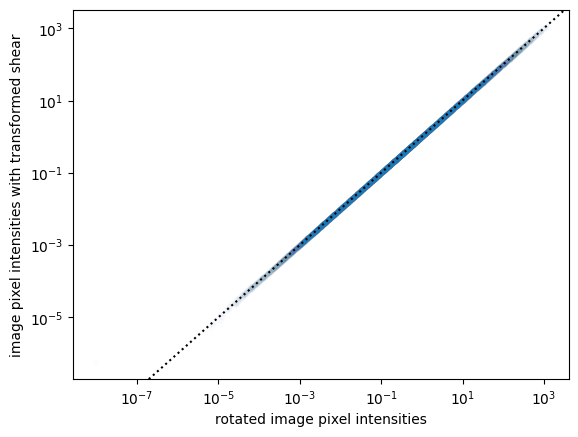

In [5]:
_ = plt.scatter(img_rotated, img_new, alpha = 0.01, s = 10)
_ = plt.axline((0,0), slope = 1, color = 'black', linestyle = 'dotted')
_ = plt.xscale('log')
_ = plt.yscale('log')
_ = plt.xlabel('rotated image pixel intensities')
_ = plt.ylabel('image pixel intensities with transformed shear')

### Flip

Flip the original image along the y-axis (i.e., horizontally):

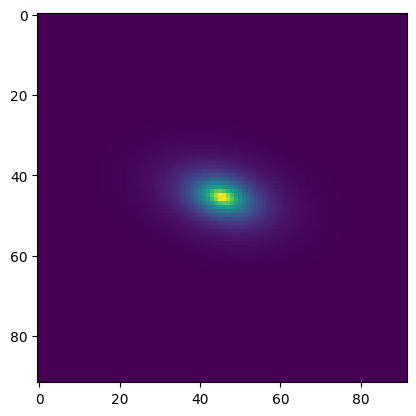

In [6]:
img_flipped = np.fliplr(img_original)
_ = plt.imshow(img_flipped)

When we flip the image horizontally, the shear changes as follows:

$$
\begin{bmatrix} \gamma_1^* \\ \gamma_2^* \end{bmatrix} = \begin{bmatrix} \gamma_1 \\ -\gamma_2 \end{bmatrix}.
$$

The convergence $\kappa$ does not change when we flip the image.

To check our work, we lens the same galaxy as above using $\gamma_1^*$ and $\gamma_2^*$:

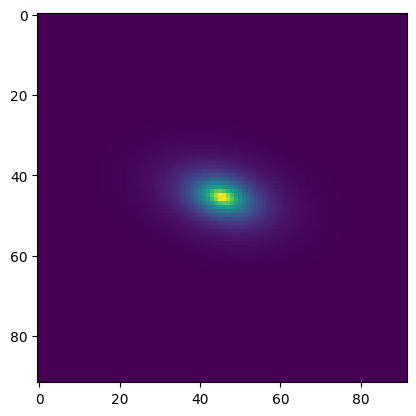

In [7]:
gamma1_new2 = gamma1
gamma2_new2 = -gamma2
kappa_new2 = kappa

g1_new2 = gamma1_new2/(1-kappa_new2)
g2_new2 = gamma2_new2/(1-kappa_new2)
mu_new2 = 1/((1-kappa_new2)**2 - gamma1_new2**2 - gamma2_new2**2)

gal_new2 = gal.lens(g1=g1_new2, g2=g2_new2, mu=mu_new2)
img_new2 = gal_new2.drawImage().array
_ = plt.imshow(img_new2)

We find that we recover the same lensed galaxy profile as in the flipped image. Here are the flattened pixel intensities of the flipped image (lensed by $\gamma_1$ and $\gamma_2$) and the new image (lensed by $\gamma_1^*$ and $\gamma_2^*$):

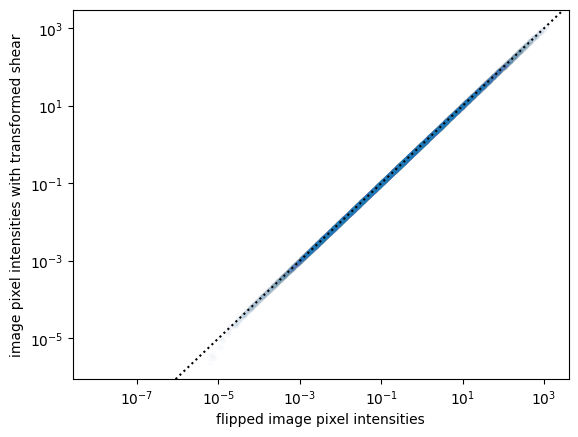

In [8]:
_ = plt.scatter(img_flipped, img_new2, alpha = 0.01, s = 10)
_ = plt.axline((0,0), slope = 1, color = 'black', linestyle = 'dotted')
_ = plt.xscale('log')
_ = plt.yscale('log')
_ = plt.xlabel('flipped image pixel intensities')
_ = plt.ylabel('image pixel intensities with transformed shear')